In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

### Data Preprocessing

In [2]:
data=pd.read_csv('Titanic-Dataset.csv')
data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Data Cleaning

In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
drop_data=['PassengerId','Name','Ticket','Fare','Cabin','Embarked']
clean_data=data.drop(drop_data,axis=1)

In [11]:
clean_data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [12]:
clean_data=clean_data.fillna(clean_data['Age'].mean())

In [13]:
# Checking Null Values
clean_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

### Data visualization 

Text(0.5, 1.0, 'Total Survived')

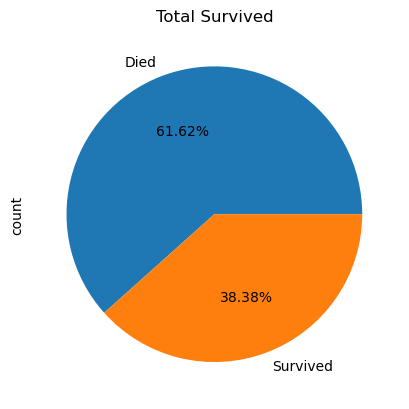

In [14]:
labels = ['Died','Survived',]
clean_data['Survived'].value_counts().plot.pie(autopct="%0.2f%%",labels=labels)
plt.title('Total Survived')

Text(0.5, 1.0, 'PCLASS')

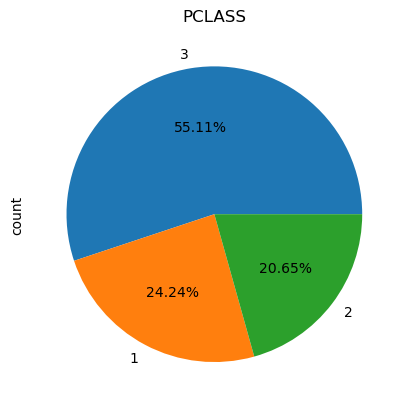

In [15]:
clean_data['Pclass'].value_counts().plot.pie(autopct="%0.2f%%")
plt.title('PCLASS')

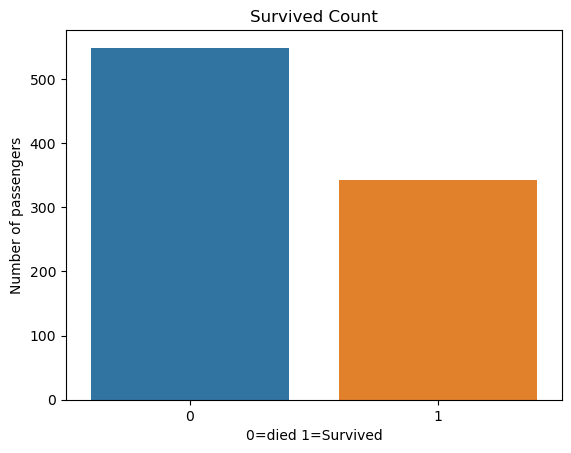

In [16]:
sns.barplot(x=clean_data['Survived'].value_counts().index,y=clean_data['Survived'].value_counts().values)
plt.title('Survived Count')
plt.xlabel('0=died 1=Survived')
plt.ylabel('Number of passengers')
plt.show()

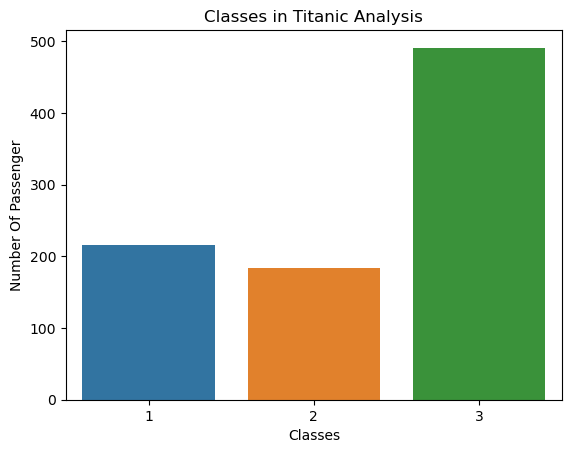

In [17]:
sns.barplot(x=clean_data['Pclass'].value_counts().index,y=clean_data['Pclass'].value_counts().values)
plt.title('Classes in Titanic Analysis')
plt.xlabel('Classes')
plt.ylabel('Number Of Passenger')
plt.show()

In [18]:
clean_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


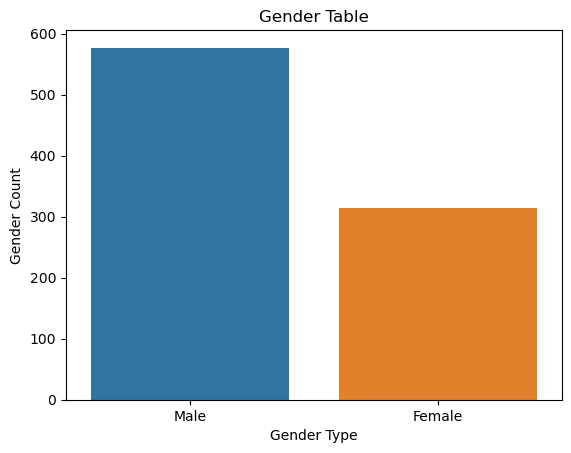

In [19]:
sns.barplot(x=['Male','Female'],y=clean_data.Sex.value_counts())
plt.title("Gender Table")
plt.xlabel('Gender Type')
plt.ylabel('Gender Count')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Age distribution Table')

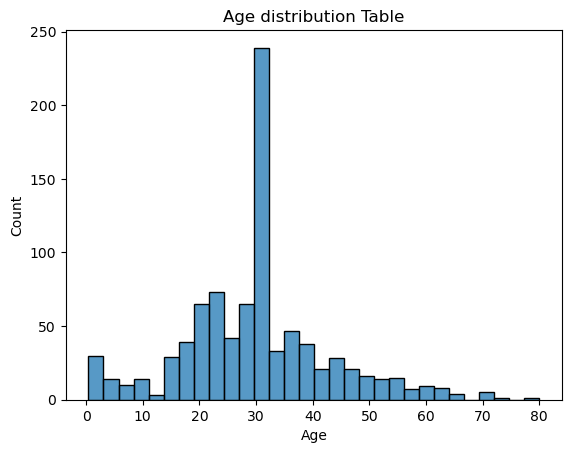

In [20]:
sns.histplot(clean_data['Age'])
plt.title('Age distribution Table')

## Machine Learning

In [21]:
clean_data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,29.699118,1,2
889,1,1,male,26.000000,0,0


In [22]:
le=LabelEncoder()

clean_data['Sex']=le.fit_transform(clean_data['Sex'])

In [23]:
clean_data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,29.699118,1,2
889,1,1,1,26.000000,0,0


In [24]:
x=clean_data.drop('Survived',axis=1)
y=clean_data['Survived']

In [25]:
x

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.000000,1,0
1,1,0,38.000000,1,0
2,3,0,26.000000,0,0
3,1,0,35.000000,1,0
4,3,1,35.000000,0,0
...,...,...,...,...,...
886,2,1,27.000000,0,0
887,1,0,19.000000,0,0
888,3,0,29.699118,1,2
889,1,1,26.000000,0,0


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=20)

In [28]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [29]:
y_pred=model.predict(xtest)

In [30]:
pd.DataFrame({'True Y Value':ytest,'Predicted Y Values':y_pred})

,True Y Value,Predicted Y Values
347,1,1
674,0,0
791,0,0
836,0,0
56,1,1
...,...,...
694,0,0
428,0,0
431,1,1
563,0,0


In [31]:
model.score(xtest,ytest)

0.8156424581005587

In [32]:
cm=confusion_matrix(ytest,y_pred)

In [33]:
cm

array([[99, 13],
       [20, 47]], dtype=int64)

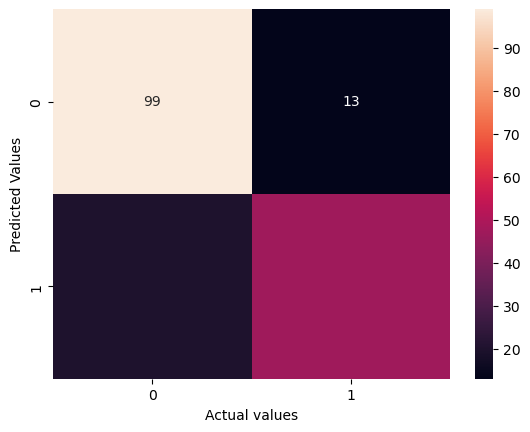

In [34]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [35]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.78      0.70      0.74        67

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



In [36]:
model2=DecisionTreeClassifier(max_depth=5)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

In [37]:
Yp=model2.predict(xtest)

In [38]:
model2.score(xtest,ytest)

0.8659217877094972

In [39]:
cm1=confusion_matrix(ytest,y_pred)
cm1

array([[99, 13],
       [20, 47]], dtype=int64)

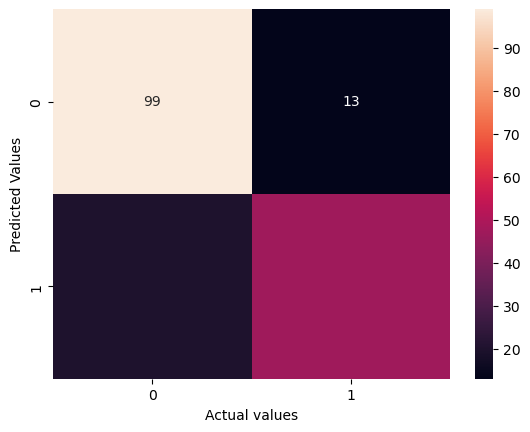

In [40]:
sns.heatmap(cm1,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [41]:
model3=RandomForestClassifier(n_estimators=200,random_state=23)
model3.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200, random_state=23)

In [42]:
yp=model3.predict(xtest)

In [43]:
model3.score(xtest,ytest)

0.8379888268156425

In [44]:
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

In [45]:
scaled_model=RandomForestClassifier(n_estimators=300,random_state=40)
scaled_model.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=300, random_state=40)

In [46]:
scaled_model.score(xtest,ytest)

0.8324022346368715

In [47]:
cm2=confusion_matrix(ytest,y_pred)
cm2

array([[99, 13],
       [20, 47]], dtype=int64)

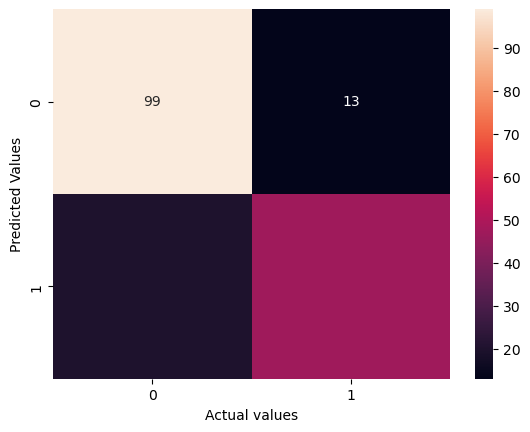

In [48]:
sns.heatmap(cm2,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [49]:
corelation=clean_data.corr()
corelation

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000


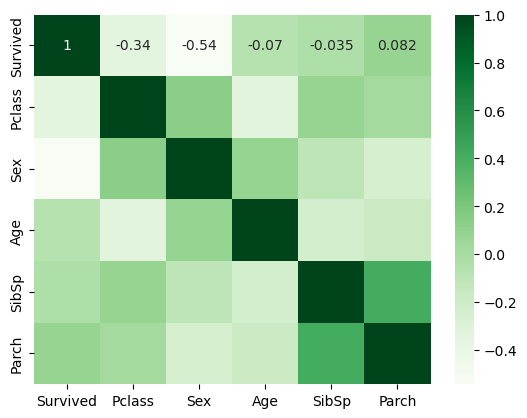

In [50]:
sns.heatmap(corelation,annot=True,cmap='Greens')
plt.show()

In [51]:
model4=KNeighborsClassifier(n_neighbors=190)
model4.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=190)

In [52]:
y_pred=model4.predict(xtest)

In [53]:
model4.score(xtest,ytest)

0.8324022346368715

In [54]:
cm=confusion_matrix(ytest,y_pred)

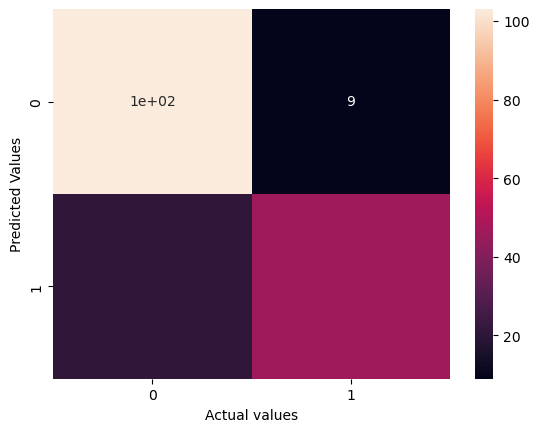

In [55]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [56]:
model5=SVC()
model5.fit(xtrain,ytrain)

SVC()

In [57]:
model5.score(xtest,ytest)

0.8379888268156425

In [58]:
model6=SVC(kernel='poly',degree=3,C=60,gamma='scale')
model6.fit(xtrain,ytrain)

SVC(C=60, kernel='poly')

In [59]:
y_pred2=model6.predict(xtest)

In [60]:
model6.score(xtest,ytest)

0.8491620111731844

In [61]:
cm=confusion_matrix(ytest,y_pred2)

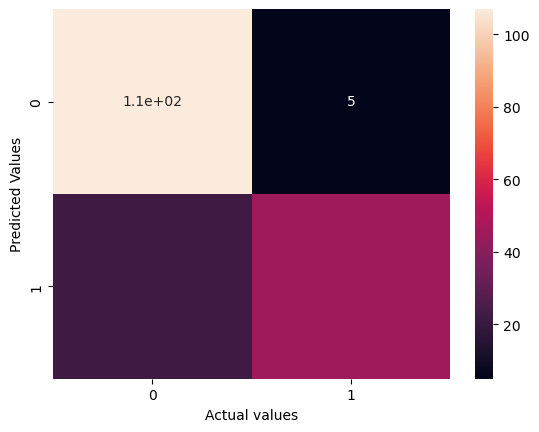

In [62]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [63]:
model7=GaussianNB()
model7.fit(xtrain,ytrain)

GaussianNB()

In [64]:
y_pred3=model7.predict(xtest)

In [65]:
model7.score(xtest,ytest)

0.8379888268156425

In [66]:
cm=confusion_matrix(ytest,y_pred3)

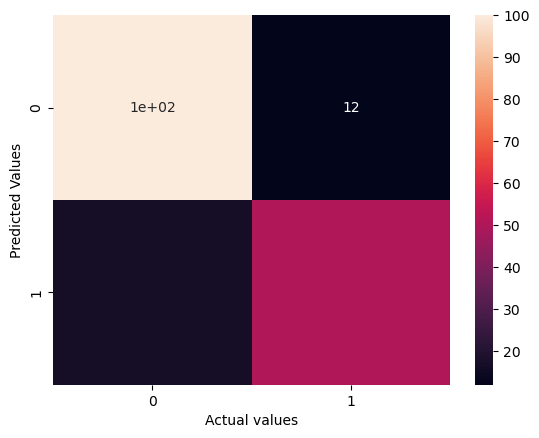

In [67]:
sns.heatmap(cm,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()